In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
tf.__version__

'2.18.0'

**Data Preprocessing**

In [ ]:
customer_data = pd.read_csv('/Churn_Modelling.csv')
customer_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
customer_data.shape


(10000, 14)

In [ ]:
customer_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
customer_data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
customer_data.duplicated().any()

False

In [ ]:
cat_cols = customer_data.select_dtypes(include='object').columns.tolist()
num_cols = customer_data.select_dtypes(exclude='object').columns.tolist()


['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
print(cat_cols)
print(num_cols)

['Surname', 'Geography', 'Gender']
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


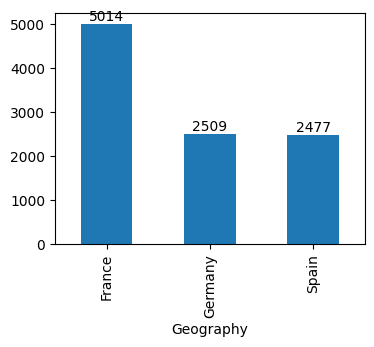

In [ ]:
plt.figure(figsize=(4,3))
ax = customer_data['Geography'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

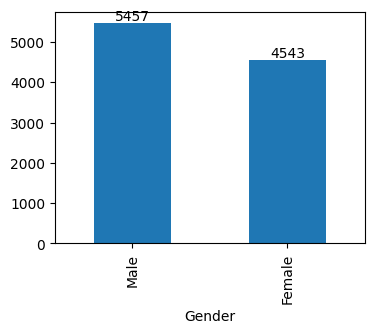

In [ ]:
plt.figure(figsize=(4,3))
ax = customer_data['Gender'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

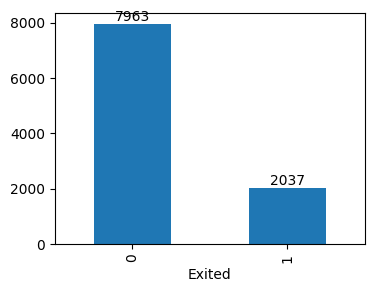

In [ ]:
plt.figure(figsize=(4,3))
ax = customer_data['Exited'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
    plt.show()

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
customer_data.groupby('Exited')[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Exited,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


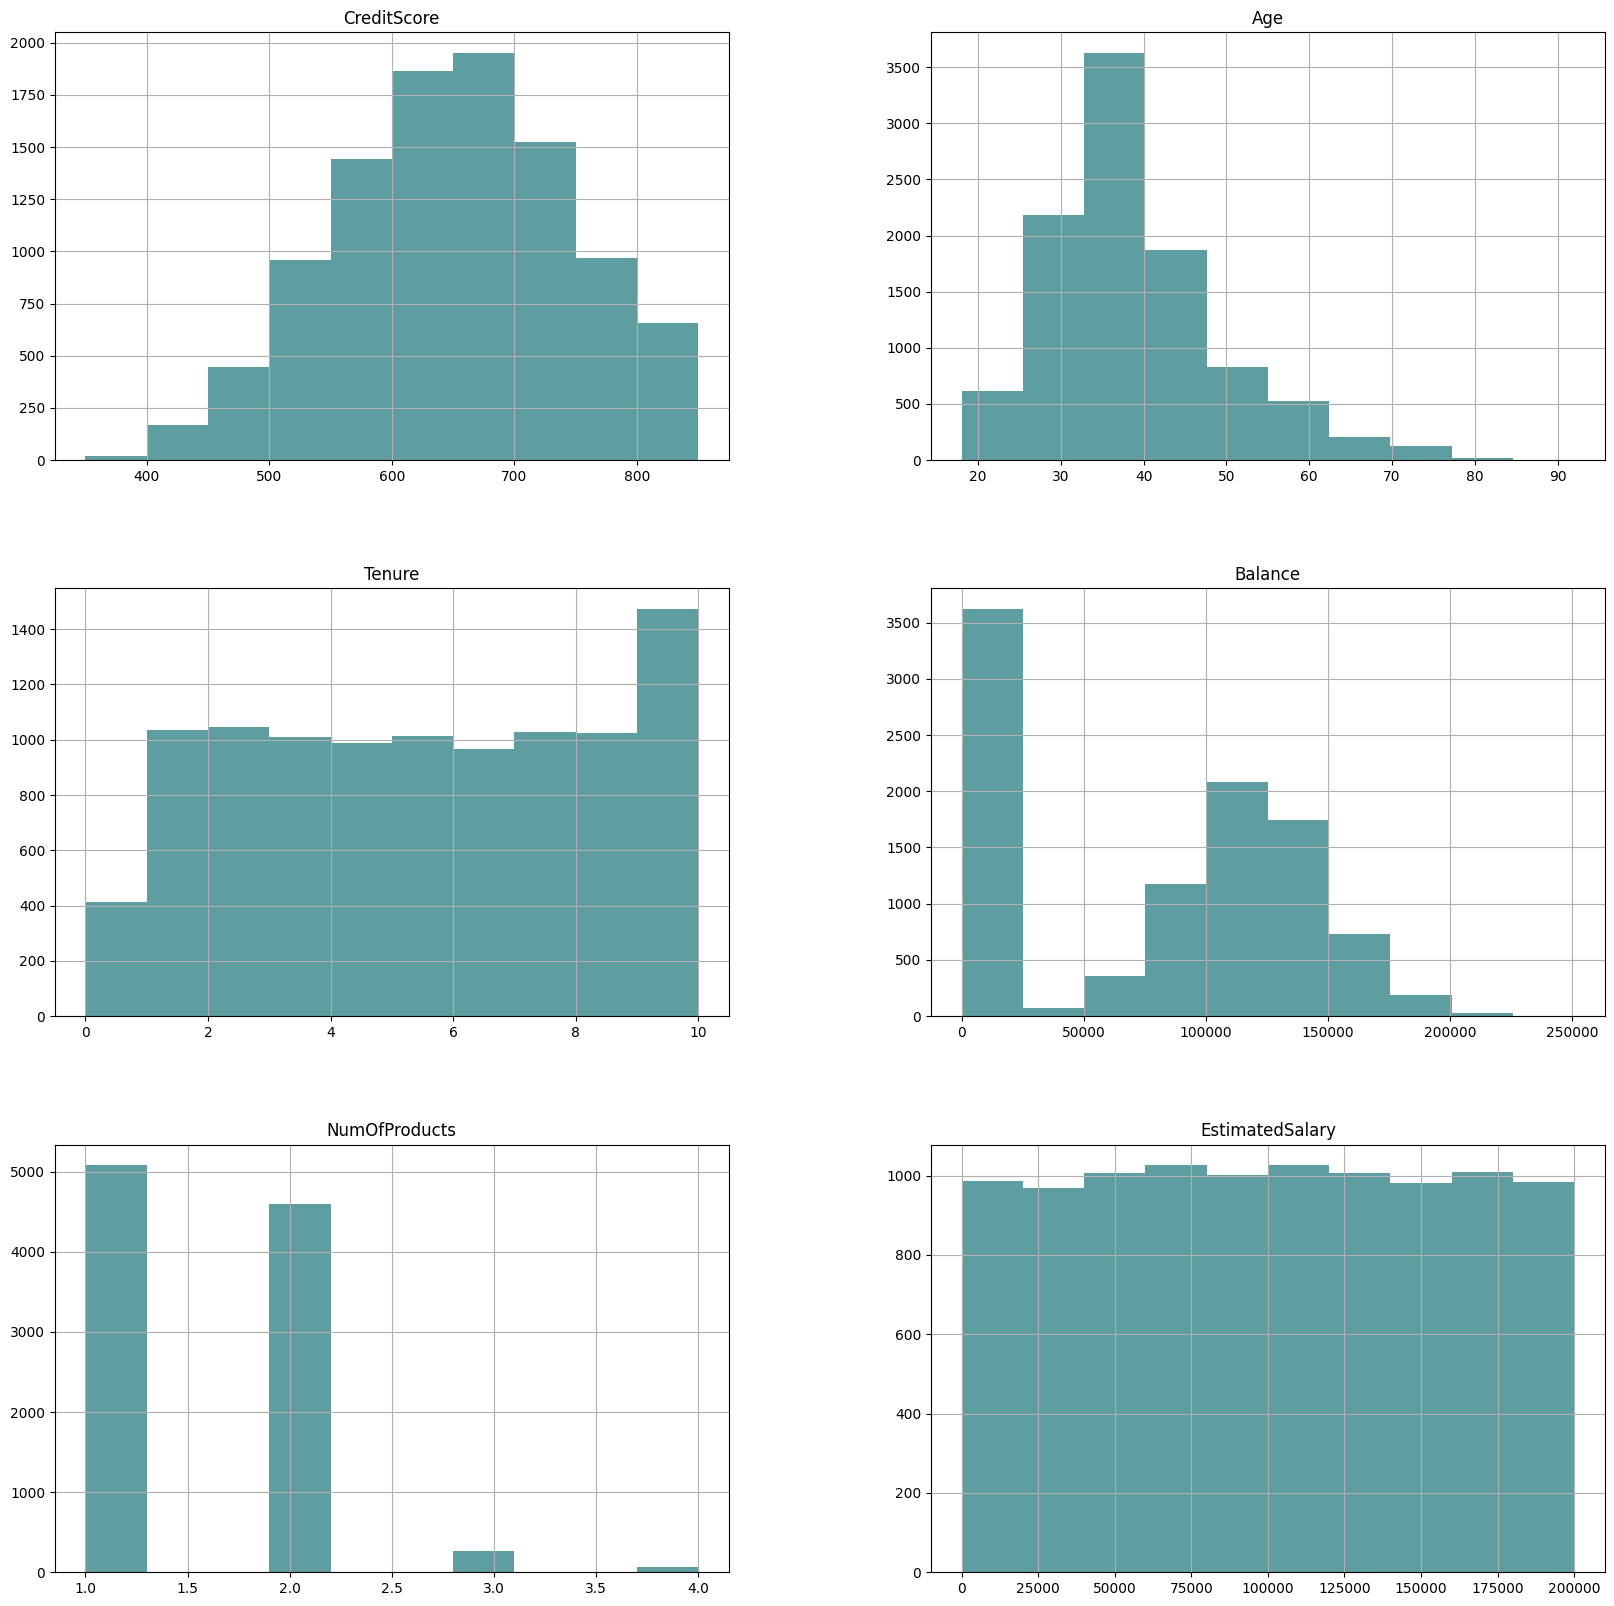

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_hist_plot = customer_data[num_cols].hist(figsize=(20,20), color = '#5f9ea0')

In [ ]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = customer_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = customer_data['Exited']

In [ ]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


**Encoding Categorical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
X['Gender'] = le.fit_transform(X['Gender'])
cat_code = dict(zip(le.classes_, le.transform(le.classes_)))
print(cat_code)

{'Female': 0, 'Male': 1}


In [ ]:
X['Geography'] = le.fit_transform(X['Geography'])
cat_code = dict(zip(le.classes_, le.transform(le.classes_)))
print(cat_code)

{'France': 0, 'Germany': 1, 'Spain': 2}


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


**Splitting the dataset Into Training Set and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building The ANN**













Initialize ANN


In [ ]:
ann = tf.keras.models.Sequential()

Adding The Input Layer and First Hidden Layer


In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation= 'relu'))

Adding the Second Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='relu') )

Adding The Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

**Traing The ANN**

Compiling the ANN

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Traing the ANN on Training set

In [ ]:
ann.fit(X_train, y_train, batch_size=250 , epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8009 - loss: 0.6908
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.6819
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7967 - loss: 0.6728
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7938 - loss: 0.6646
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.6560
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.6494
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.6423
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.6340
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.6265
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.6207
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.6142
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - lo

Making the Prediction and Evaluating the Model

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:








cs = int(input(' Enter the Credit Score: '))
geo = int(input('Enter the Geography: '))
gender = int(input('Enter the Gender: '))
age = int(input('Age: '))
ten = int(input('Tenure: '))
bal = int(input('Balance: '))
prod = int(input('Number of Products: '))
cred = int(input('Credit Card: '))
act = int(input('Active Member: '))
sal = int(input('Estimated Salary: '))

 Enter the Credit Score: 619
Enter the Geography: 0
Enter the Gender: 1
Age: 42
Tenure: 2
Balance: 24000
Number of Products: 2
Credit Card: 1
Active Member: 1
Estimated Salary: 50000


In [ ]:
input_data = [cs, geo, gender, age, ten, bal, prod, cred, act, sal]
scaled_data = sc.transform([input_data])
prediction = ann.predict(scaled_data)
print(prediction)
pred = prediction > 0.5
if pred[0][0] == False:
  print('Customer stays in the Bank')
else:
  print('Customer leaves the Bank')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.25431043]]
Customer stays in the Bank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Predicting The Test Set Results**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = [re[0] for re in y_pred]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Accuracy and Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1607    0]
 [ 393    0]]


0.8035

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Accuracy: 81.45%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 86.45%


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")


XGBoost Accuracy: 86.80%


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 80.35%
